In [10]:
pip install pymitter

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 0, 'Receivers')

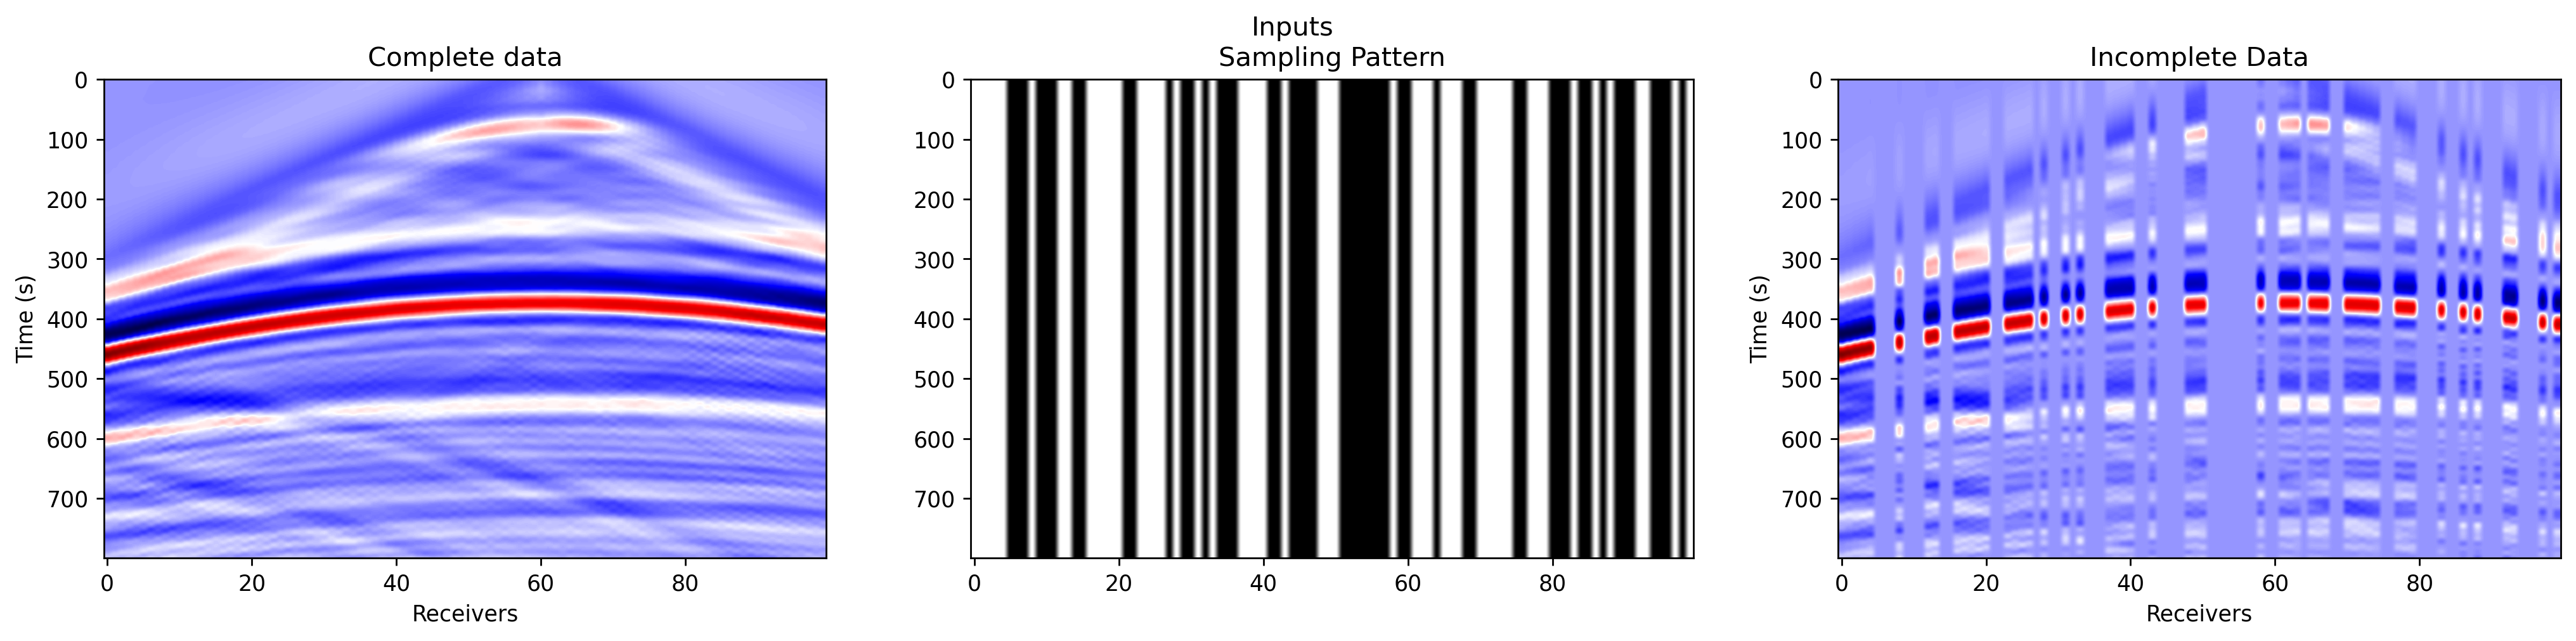

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
from skimage.metrics import structural_similarity as ssim
from skimage import data, img_as_float
from skimage.metrics import mean_squared_error
import math


from Function import *
import scipy


x = np.load('../Desarrollo/ReDS/data/data.npy')
x = x.T
x = x / np.abs(x).max()
maxiter =1000


'''
---------------  SAMPLING --------------------
'''
sr_rand = 0.5 # 1-compression
y_rand, pattern_rand, pattern_index= random_sampling(x,sr_rand)
H = pattern_index


# Sampling pattern
H0 = np.tile(pattern_rand.reshape(1,-1),(x.shape[0],1))


''' ---------- Visualization of SAMPLING----------
'''
fig, axs = plt.subplots(1, 3,dpi=250,figsize=(20, 4))
fig.suptitle('Inputs')

axs[0].imshow(x, cmap='seismic', aspect='auto')
axs[0].set_title('Complete data')
axs[0].set_ylabel('Time (s)')
axs[0].set_xlabel('Receivers')

axs[1].imshow(H0, cmap ='gray',aspect='auto')
axs[1].set_title('Sampling Pattern')

axs[2].imshow(y_rand, cmap='seismic', aspect='auto')
axs[2].set_title('Incomplete Data')
axs[2].set_ylabel('Time (s)')
axs[2].set_xlabel('Receivers')

In [12]:
index = 10


case = 'ADMM' 

#----------------- ADMM --------------------
Alg = Algorithms(x, H , 'DCT2D', 'IDCT2D')
rho = 1
gamma = 1
lmb = 5e-4

x_result_ADMM, hist = Alg.ADMM(rho, gamma, lmb, maxiter)

---------ADMM method---------- 

itr 	 ||x-xold|| 	 PSNR 

ADMM-TV: Iteration   5,  Error = 0.15, PSNR = 32.83 dB, time = 0.0s.
ADMM-TV: Iteration  10,  Error = 0.04, PSNR = 43.90 dB, time = 0.1s.
ADMM-TV: Iteration  15,  Error = 0.01, PSNR = 52.65 dB, time = 0.1s.
ADMM-TV: Iteration  20,  Error = 0.01, PSNR = 61.07 dB, time = 0.2s.
ADMM-TV: Iteration  25,  Error = 0.00, PSNR = 68.36 dB, time = 0.2s.
ADMM-TV: Iteration  30,  Error = 0.00, PSNR = 74.76 dB, time = 0.3s.
ADMM-TV: Iteration  35,  Error = 0.00, PSNR = 82.29 dB, time = 0.3s.
ADMM-TV: Iteration  40,  Error = 0.00, PSNR = 89.70 dB, time = 0.4s.
ADMM-TV: Iteration  45,  Error = 0.00, PSNR = 96.52 dB, time = 0.4s.
ADMM-TV: Iteration  50,  Error = 0.00, PSNR = 103.02 dB, time = 0.4s.
ADMM-TV: Iteration  55,  Error = 0.00, PSNR = 109.31 dB, time = 0.5s.
ADMM-TV: Iteration  60,  Error = 0.00, PSNR = 115.46 dB, time = 0.5s.
ADMM-TV: Iteration  65,  Error = 0.00, PSNR = 121.50 dB, time = 0.5s.
ADMM-TV: Iteration  70,  Error = 0.00, P

ADMM-TV: Iteration 615,  Error = 0.00, PSNR = 320.40 dB, time = 5.0s.
ADMM-TV: Iteration 620,  Error = 0.00, PSNR = 320.38 dB, time = 5.0s.
ADMM-TV: Iteration 625,  Error = 0.00, PSNR = 320.54 dB, time = 5.1s.
ADMM-TV: Iteration 630,  Error = 0.00, PSNR = 320.38 dB, time = 5.1s.
ADMM-TV: Iteration 635,  Error = 0.00, PSNR = 320.62 dB, time = 5.2s.
ADMM-TV: Iteration 640,  Error = 0.00, PSNR = 320.60 dB, time = 5.2s.
ADMM-TV: Iteration 645,  Error = 0.00, PSNR = 320.59 dB, time = 5.3s.
ADMM-TV: Iteration 650,  Error = 0.00, PSNR = 320.54 dB, time = 5.3s.
ADMM-TV: Iteration 655,  Error = 0.00, PSNR = 320.46 dB, time = 5.4s.
ADMM-TV: Iteration 660,  Error = 0.00, PSNR = 320.51 dB, time = 5.5s.
ADMM-TV: Iteration 665,  Error = 0.00, PSNR = 320.44 dB, time = 5.5s.
ADMM-TV: Iteration 670,  Error = 0.00, PSNR = 320.51 dB, time = 5.5s.
ADMM-TV: Iteration 675,  Error = 0.00, PSNR = 320.38 dB, time = 5.6s.
ADMM-TV: Iteration 680,  Error = 0.00, PSNR = 320.41 dB, time = 5.6s.
ADMM-TV: Iteration 6

Text(0, 0.5, 'Error')

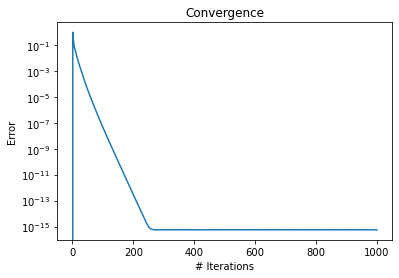

In [13]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')
plt.ylabel('Error')

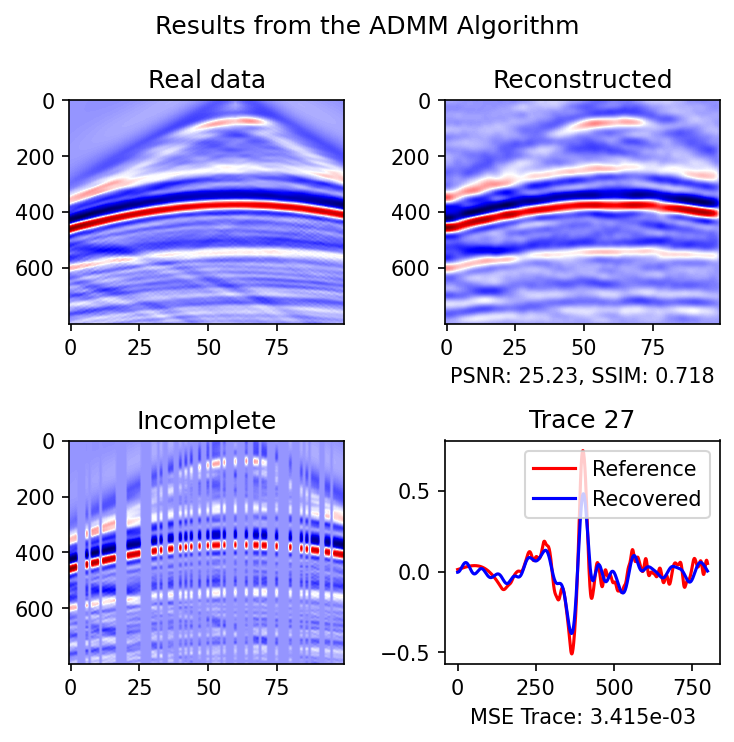

In [14]:
x_rec = x_result_ADMM.copy()

temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

plt.savefig("../admm_results_.eps", dpi=250)

In [15]:
index = 10


case = 'FISTA' 

#----------------- FISTA --------------------
Alg = Algorithms(x, H , 'DCT2D', 'IDCT2D')
tau = 0.1
mu = 0.3
x_result_FISTA, hist = Alg.FISTA(tau, mu, maxiter)


 FISTA: 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 6.917 dB 

2 	 Error: 4.1177e-01 	 PSNR: 13.538 dB 

3 	 Error: 2.6978e-01 	 PSNR: 16.857 dB 

4 	 Error: 1.7459e-01 	 PSNR: 18.530 dB 

5 	 Error: 1.0672e-01 	 PSNR: 19.308 dB 

6 	 Error: 5.7904e-02 	 PSNR: 19.603 dB 

7 	 Error: 2.4113e-02 	 PSNR: 19.638 dB 

8 	 Error: 2.9073e-03 	 PSNR: 19.545 dB 

9 	 Error: 8.2961e-03 	 PSNR: 19.410 dB 

10 	 Error: 1.1658e-02 	 PSNR: 19.290 dB 

11 	 Error: 1.0150e-02 	 PSNR: 19.215 dB 

12 	 Error: 6.4361e-03 	 PSNR: 19.188 dB 

13 	 Error: 2.6591e-03 	 PSNR: 19.198 dB 

14 	 Error: 1.2632e-03 	 PSNR: 19.228 dB 

15 	 Error: 2.3539e-03 	 PSNR: 19.261 dB 

16 	 Error: 2.6318e-03 	 PSNR: 19.289 dB 

17 	 Error: 2.2391e-03 	 PSNR: 19.306 dB 

18 	 Error: 1.6931e-03 	 PSNR: 19.314 dB 

19 	 Error: 1.4337e-03 	 PSNR: 19.316 dB 

20 	 Error: 1.4849e-03 	 PSNR: 19.316 dB 

21 	 Error: 1.5820e-03 	 PSNR: 19.316 dB 

22 	 Error: 1.6168e-03 	 PSNR: 19.319 dB 

23 	 Error: 1.6210e-03 	 PSN

194 	 Error: 3.5670e-03 	 PSNR: 23.634 dB 

195 	 Error: 3.5645e-03 	 PSNR: 23.677 dB 

196 	 Error: 3.5616e-03 	 PSNR: 23.720 dB 

197 	 Error: 3.5585e-03 	 PSNR: 23.763 dB 

198 	 Error: 3.5555e-03 	 PSNR: 23.806 dB 

199 	 Error: 3.5512e-03 	 PSNR: 23.850 dB 

200 	 Error: 3.5459e-03 	 PSNR: 23.893 dB 

201 	 Error: 3.5398e-03 	 PSNR: 23.937 dB 

202 	 Error: 3.5334e-03 	 PSNR: 23.981 dB 

203 	 Error: 3.5274e-03 	 PSNR: 24.025 dB 

204 	 Error: 3.5215e-03 	 PSNR: 24.070 dB 

205 	 Error: 3.5153e-03 	 PSNR: 24.115 dB 

206 	 Error: 3.5082e-03 	 PSNR: 24.160 dB 

207 	 Error: 3.5010e-03 	 PSNR: 24.205 dB 

208 	 Error: 3.4935e-03 	 PSNR: 24.251 dB 

209 	 Error: 3.4861e-03 	 PSNR: 24.297 dB 

210 	 Error: 3.4795e-03 	 PSNR: 24.342 dB 

211 	 Error: 3.4733e-03 	 PSNR: 24.389 dB 

212 	 Error: 3.4674e-03 	 PSNR: 24.435 dB 

213 	 Error: 3.4616e-03 	 PSNR: 24.481 dB 

214 	 Error: 3.4557e-03 	 PSNR: 24.528 dB 

215 	 Error: 3.4504e-03 	 PSNR: 24.575 dB 

216 	 Error: 3.4440e-03 	 PSNR: 

401 	 Error: 1.6465e-03 	 PSNR: 35.144 dB 

402 	 Error: 1.6373e-03 	 PSNR: 35.174 dB 

403 	 Error: 1.6280e-03 	 PSNR: 35.204 dB 

404 	 Error: 1.6174e-03 	 PSNR: 35.232 dB 

405 	 Error: 1.6073e-03 	 PSNR: 35.260 dB 

406 	 Error: 1.5960e-03 	 PSNR: 35.286 dB 

407 	 Error: 1.5844e-03 	 PSNR: 35.312 dB 

408 	 Error: 1.5721e-03 	 PSNR: 35.337 dB 

409 	 Error: 1.5605e-03 	 PSNR: 35.361 dB 

410 	 Error: 1.5464e-03 	 PSNR: 35.385 dB 

411 	 Error: 1.5335e-03 	 PSNR: 35.407 dB 

412 	 Error: 1.5220e-03 	 PSNR: 35.429 dB 

413 	 Error: 1.5111e-03 	 PSNR: 35.451 dB 

414 	 Error: 1.5002e-03 	 PSNR: 35.471 dB 

415 	 Error: 1.4902e-03 	 PSNR: 35.491 dB 

416 	 Error: 1.4803e-03 	 PSNR: 35.509 dB 

417 	 Error: 1.4690e-03 	 PSNR: 35.528 dB 

418 	 Error: 1.4575e-03 	 PSNR: 35.546 dB 

419 	 Error: 1.4468e-03 	 PSNR: 35.563 dB 

420 	 Error: 1.4361e-03 	 PSNR: 35.579 dB 

421 	 Error: 1.4248e-03 	 PSNR: 35.595 dB 

422 	 Error: 1.4126e-03 	 PSNR: 35.610 dB 

423 	 Error: 1.4014e-03 	 PSNR: 

601 	 Error: 4.2843e-04 	 PSNR: 35.932 dB 

602 	 Error: 4.2668e-04 	 PSNR: 35.932 dB 

603 	 Error: 4.2414e-04 	 PSNR: 35.931 dB 

604 	 Error: 4.2177e-04 	 PSNR: 35.931 dB 

605 	 Error: 4.1640e-04 	 PSNR: 35.931 dB 

606 	 Error: 4.1194e-04 	 PSNR: 35.931 dB 

607 	 Error: 4.0708e-04 	 PSNR: 35.931 dB 

608 	 Error: 4.0331e-04 	 PSNR: 35.932 dB 

609 	 Error: 4.0056e-04 	 PSNR: 35.932 dB 

610 	 Error: 3.9838e-04 	 PSNR: 35.933 dB 

611 	 Error: 3.9709e-04 	 PSNR: 35.933 dB 

612 	 Error: 3.9674e-04 	 PSNR: 35.934 dB 

613 	 Error: 3.9517e-04 	 PSNR: 35.935 dB 

614 	 Error: 3.9455e-04 	 PSNR: 35.937 dB 

615 	 Error: 3.9453e-04 	 PSNR: 35.938 dB 

616 	 Error: 3.9469e-04 	 PSNR: 35.940 dB 

617 	 Error: 3.9381e-04 	 PSNR: 35.941 dB 

618 	 Error: 3.9385e-04 	 PSNR: 35.943 dB 

619 	 Error: 3.9448e-04 	 PSNR: 35.945 dB 

620 	 Error: 3.9558e-04 	 PSNR: 35.947 dB 

621 	 Error: 3.9695e-04 	 PSNR: 35.949 dB 

622 	 Error: 3.9903e-04 	 PSNR: 35.951 dB 

623 	 Error: 4.0191e-04 	 PSNR: 

812 	 Error: 1.5570e-04 	 PSNR: 36.228 dB 

813 	 Error: 1.5283e-04 	 PSNR: 36.227 dB 

814 	 Error: 1.5139e-04 	 PSNR: 36.227 dB 

815 	 Error: 1.5057e-04 	 PSNR: 36.227 dB 

816 	 Error: 1.4947e-04 	 PSNR: 36.227 dB 

817 	 Error: 1.4811e-04 	 PSNR: 36.226 dB 

818 	 Error: 1.4748e-04 	 PSNR: 36.226 dB 

819 	 Error: 1.4689e-04 	 PSNR: 36.226 dB 

820 	 Error: 1.4660e-04 	 PSNR: 36.226 dB 

821 	 Error: 1.4701e-04 	 PSNR: 36.226 dB 

822 	 Error: 1.4802e-04 	 PSNR: 36.226 dB 

823 	 Error: 1.4966e-04 	 PSNR: 36.226 dB 

824 	 Error: 1.5191e-04 	 PSNR: 36.226 dB 

825 	 Error: 1.5415e-04 	 PSNR: 36.226 dB 

826 	 Error: 1.5693e-04 	 PSNR: 36.226 dB 

827 	 Error: 1.5809e-04 	 PSNR: 36.226 dB 

828 	 Error: 1.5944e-04 	 PSNR: 36.226 dB 

829 	 Error: 1.5991e-04 	 PSNR: 36.226 dB 

830 	 Error: 1.5994e-04 	 PSNR: 36.226 dB 

831 	 Error: 1.5993e-04 	 PSNR: 36.226 dB 

832 	 Error: 1.5884e-04 	 PSNR: 36.226 dB 

833 	 Error: 1.5785e-04 	 PSNR: 36.226 dB 

834 	 Error: 1.5426e-04 	 PSNR: 

Text(0, 0.5, 'Error')

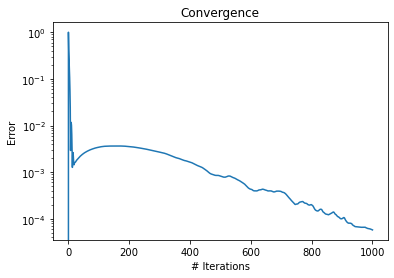

In [16]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')
plt.ylabel('Error')

In [17]:
np.max(x) #_result_FISTA)

1.0

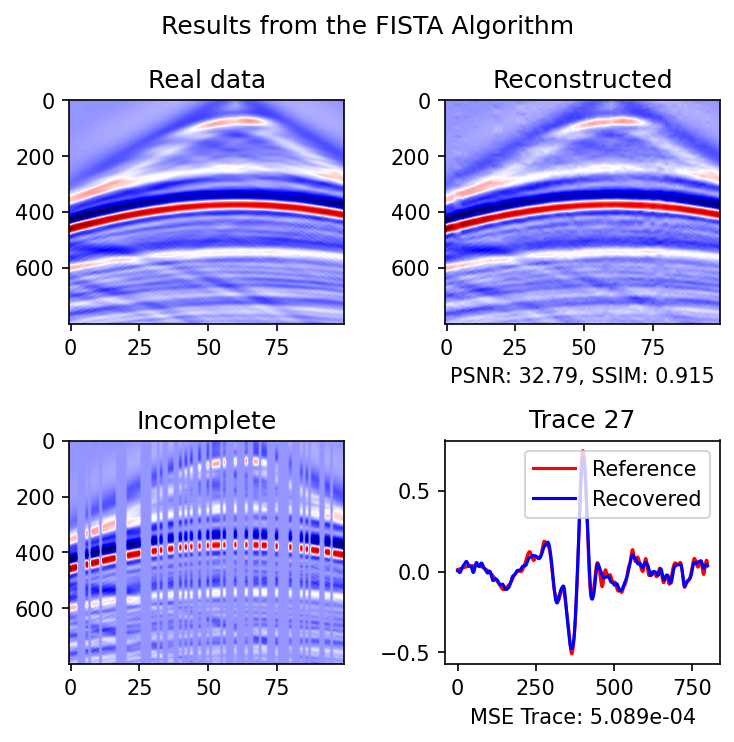

In [18]:
x_rec = x_result_FISTA.copy()

temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

plt.savefig("../FISTA_results_.eps", dpi=250)

In [19]:
case = 'GAP' 

# ------------------GAP--------------
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
tau = 1e-0
x_result_GAP, hist = Alg.GAP(tau, maxiter) # inputs: tau, maxiter





---------GAP method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 19.229 dB 

2 	 Error: 2.9448e-03 	 PSNR: 19.240 dB 

3 	 Error: 2.8291e-03 	 PSNR: 19.251 dB 

4 	 Error: 2.7296e-03 	 PSNR: 19.262 dB 

5 	 Error: 2.6497e-03 	 PSNR: 19.273 dB 

6 	 Error: 2.5774e-03 	 PSNR: 19.284 dB 

7 	 Error: 2.5116e-03 	 PSNR: 19.295 dB 

8 	 Error: 2.4580e-03 	 PSNR: 19.305 dB 

9 	 Error: 2.4123e-03 	 PSNR: 19.316 dB 

10 	 Error: 2.3651e-03 	 PSNR: 19.326 dB 

11 	 Error: 2.3183e-03 	 PSNR: 19.337 dB 

12 	 Error: 2.2776e-03 	 PSNR: 19.347 dB 

13 	 Error: 2.2409e-03 	 PSNR: 19.358 dB 

14 	 Error: 2.2083e-03 	 PSNR: 19.368 dB 

15 	 Error: 2.1789e-03 	 PSNR: 19.378 dB 

16 	 Error: 2.1525e-03 	 PSNR: 19.388 dB 

17 	 Error: 2.1263e-03 	 PSNR: 19.398 dB 

18 	 Error: 2.1023e-03 	 PSNR: 19.408 dB 

19 	 Error: 2.0780e-03 	 PSNR: 19.418 dB 

20 	 Error: 2.0560e-03 	 PSNR: 19.428 dB 

21 	 Error: 2.0354e-03 	 PSNR: 19.438 dB 

22 	 Error: 2.0154e-03 	 PSNR: 19.448 dB 

23 	 

207 	 Error: 1.0620e-03 	 PSNR: 21.144 dB 

208 	 Error: 1.0600e-03 	 PSNR: 21.153 dB 

209 	 Error: 1.0580e-03 	 PSNR: 21.162 dB 

210 	 Error: 1.0562e-03 	 PSNR: 21.170 dB 

211 	 Error: 1.0538e-03 	 PSNR: 21.179 dB 

212 	 Error: 1.0511e-03 	 PSNR: 21.188 dB 

213 	 Error: 1.0486e-03 	 PSNR: 21.196 dB 

214 	 Error: 1.0465e-03 	 PSNR: 21.205 dB 

215 	 Error: 1.0448e-03 	 PSNR: 21.213 dB 

216 	 Error: 1.0432e-03 	 PSNR: 21.222 dB 

217 	 Error: 1.0414e-03 	 PSNR: 21.231 dB 

218 	 Error: 1.0385e-03 	 PSNR: 21.239 dB 

219 	 Error: 1.0356e-03 	 PSNR: 21.248 dB 

220 	 Error: 1.0330e-03 	 PSNR: 21.256 dB 

221 	 Error: 1.0290e-03 	 PSNR: 21.265 dB 

222 	 Error: 1.0251e-03 	 PSNR: 21.274 dB 

223 	 Error: 1.0213e-03 	 PSNR: 21.282 dB 

224 	 Error: 1.0184e-03 	 PSNR: 21.291 dB 

225 	 Error: 1.0159e-03 	 PSNR: 21.300 dB 

226 	 Error: 1.0134e-03 	 PSNR: 21.308 dB 

227 	 Error: 1.0105e-03 	 PSNR: 21.317 dB 

228 	 Error: 1.0073e-03 	 PSNR: 21.325 dB 

229 	 Error: 1.0043e-03 	 PSNR: 

429 	 Error: 7.2016e-04 	 PSNR: 23.033 dB 

430 	 Error: 7.1791e-04 	 PSNR: 23.041 dB 

431 	 Error: 7.1569e-04 	 PSNR: 23.050 dB 

432 	 Error: 7.1409e-04 	 PSNR: 23.058 dB 

433 	 Error: 7.1293e-04 	 PSNR: 23.067 dB 

434 	 Error: 7.1146e-04 	 PSNR: 23.075 dB 

435 	 Error: 7.0999e-04 	 PSNR: 23.083 dB 

436 	 Error: 7.0858e-04 	 PSNR: 23.092 dB 

437 	 Error: 7.0736e-04 	 PSNR: 23.100 dB 

438 	 Error: 7.0643e-04 	 PSNR: 23.108 dB 

439 	 Error: 7.0561e-04 	 PSNR: 23.117 dB 

440 	 Error: 7.0491e-04 	 PSNR: 23.125 dB 

441 	 Error: 7.0436e-04 	 PSNR: 23.134 dB 

442 	 Error: 7.0366e-04 	 PSNR: 23.142 dB 

443 	 Error: 7.0295e-04 	 PSNR: 23.150 dB 

444 	 Error: 7.0224e-04 	 PSNR: 23.159 dB 

445 	 Error: 7.0165e-04 	 PSNR: 23.167 dB 

446 	 Error: 7.0101e-04 	 PSNR: 23.176 dB 

447 	 Error: 7.0036e-04 	 PSNR: 23.184 dB 

448 	 Error: 6.9945e-04 	 PSNR: 23.192 dB 

449 	 Error: 6.9859e-04 	 PSNR: 23.201 dB 

450 	 Error: 6.9734e-04 	 PSNR: 23.209 dB 

451 	 Error: 6.9602e-04 	 PSNR: 

640 	 Error: 5.4658e-04 	 PSNR: 24.811 dB 

641 	 Error: 5.4574e-04 	 PSNR: 24.820 dB 

642 	 Error: 5.4467e-04 	 PSNR: 24.828 dB 

643 	 Error: 5.4380e-04 	 PSNR: 24.837 dB 

644 	 Error: 5.4300e-04 	 PSNR: 24.845 dB 

645 	 Error: 5.4199e-04 	 PSNR: 24.853 dB 

646 	 Error: 5.4115e-04 	 PSNR: 24.862 dB 

647 	 Error: 5.4047e-04 	 PSNR: 24.870 dB 

648 	 Error: 5.3970e-04 	 PSNR: 24.879 dB 

649 	 Error: 5.3903e-04 	 PSNR: 24.887 dB 

650 	 Error: 5.3842e-04 	 PSNR: 24.896 dB 

651 	 Error: 5.3779e-04 	 PSNR: 24.904 dB 

652 	 Error: 5.3719e-04 	 PSNR: 24.913 dB 

653 	 Error: 5.3661e-04 	 PSNR: 24.921 dB 

654 	 Error: 5.3614e-04 	 PSNR: 24.929 dB 

655 	 Error: 5.3568e-04 	 PSNR: 24.938 dB 

656 	 Error: 5.3506e-04 	 PSNR: 24.946 dB 

657 	 Error: 5.3426e-04 	 PSNR: 24.955 dB 

658 	 Error: 5.3349e-04 	 PSNR: 24.963 dB 

659 	 Error: 5.3282e-04 	 PSNR: 24.972 dB 

660 	 Error: 5.3230e-04 	 PSNR: 24.980 dB 

661 	 Error: 5.3188e-04 	 PSNR: 24.989 dB 

662 	 Error: 5.3152e-04 	 PSNR: 

842 	 Error: 4.2318e-04 	 PSNR: 26.517 dB 

843 	 Error: 4.2279e-04 	 PSNR: 26.526 dB 

844 	 Error: 4.2240e-04 	 PSNR: 26.534 dB 

845 	 Error: 4.2189e-04 	 PSNR: 26.542 dB 

846 	 Error: 4.2154e-04 	 PSNR: 26.551 dB 

847 	 Error: 4.2120e-04 	 PSNR: 26.559 dB 

848 	 Error: 4.2083e-04 	 PSNR: 26.568 dB 

849 	 Error: 4.2045e-04 	 PSNR: 26.576 dB 

850 	 Error: 4.2004e-04 	 PSNR: 26.584 dB 

851 	 Error: 4.1960e-04 	 PSNR: 26.593 dB 

852 	 Error: 4.1917e-04 	 PSNR: 26.601 dB 

853 	 Error: 4.1867e-04 	 PSNR: 26.610 dB 

854 	 Error: 4.1823e-04 	 PSNR: 26.618 dB 

855 	 Error: 4.1780e-04 	 PSNR: 26.626 dB 

856 	 Error: 4.1746e-04 	 PSNR: 26.635 dB 

857 	 Error: 4.1714e-04 	 PSNR: 26.643 dB 

858 	 Error: 4.1681e-04 	 PSNR: 26.651 dB 

859 	 Error: 4.1642e-04 	 PSNR: 26.660 dB 

860 	 Error: 4.1578e-04 	 PSNR: 26.668 dB 

861 	 Error: 4.1472e-04 	 PSNR: 26.677 dB 

862 	 Error: 4.1384e-04 	 PSNR: 26.685 dB 

863 	 Error: 4.1310e-04 	 PSNR: 26.693 dB 

864 	 Error: 4.1222e-04 	 PSNR: 

Text(0, 0.5, 'Error')

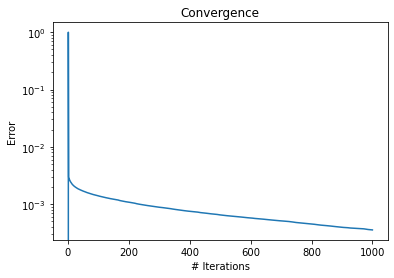

In [20]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')

plt.xlabel('# Iterations')
plt.ylabel('Error')

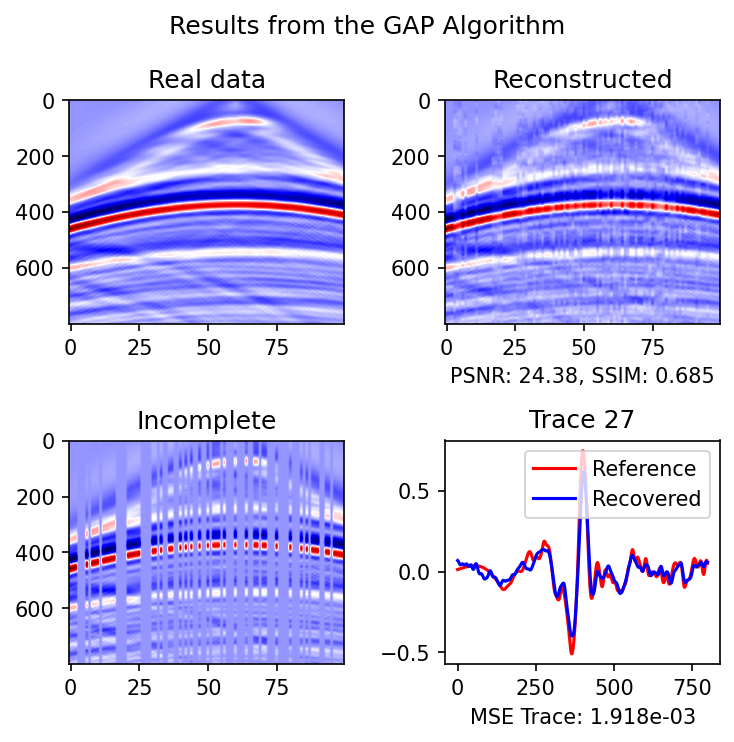

In [21]:
# -----------------
x_rec = x_result_GAP.copy()

#-----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]

fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

plt.savefig("../GAP_results_.eps", dpi=250)

In [22]:
case = 'TWIST' 

# ------------------TwIST--------------
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
# default parameters
alpha = 1.2
beta  = 1.998
tau = 0.9

x_result_TWIST, hist = Alg.TwIST(tau, alpha, beta, maxiter)



---------TwIST method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 22.071 dB 

2 	 Error: 3.9450e+00 	 PSNR: 9.947 dB 

3 	 Error: 6.8360e-01 	 PSNR: 21.062 dB 

4 	 Error: 4.1943e-01 	 PSNR: 18.334 dB 

5 	 Error: 1.2375e-01 	 PSNR: 19.551 dB 

6 	 Error: 2.5942e-02 	 PSNR: 19.360 dB 

7 	 Error: 6.9617e-03 	 PSNR: 19.336 dB 

8 	 Error: 1.0410e-02 	 PSNR: 19.439 dB 

9 	 Error: 7.7017e-03 	 PSNR: 19.408 dB 

10 	 Error: 5.7390e-03 	 PSNR: 19.458 dB 

11 	 Error: 4.6773e-03 	 PSNR: 19.469 dB 

12 	 Error: 4.4960e-03 	 PSNR: 19.494 dB 

13 	 Error: 4.3749e-03 	 PSNR: 19.516 dB 

14 	 Error: 4.2941e-03 	 PSNR: 19.537 dB 

15 	 Error: 4.2231e-03 	 PSNR: 19.560 dB 

16 	 Error: 4.1526e-03 	 PSNR: 19.582 dB 

17 	 Error: 4.0993e-03 	 PSNR: 19.604 dB 

18 	 Error: 4.0457e-03 	 PSNR: 19.626 dB 

19 	 Error: 3.9931e-03 	 PSNR: 19.648 dB 

20 	 Error: 3.9397e-03 	 PSNR: 19.671 dB 

21 	 Error: 3.8859e-03 	 PSNR: 19.692 dB 

22 	 Error: 3.8393e-03 	 PSNR: 19.714 dB 

23 	

209 	 Error: 1.5214e-03 	 PSNR: 23.372 dB 

210 	 Error: 1.5169e-03 	 PSNR: 23.391 dB 

211 	 Error: 1.5140e-03 	 PSNR: 23.409 dB 

212 	 Error: 1.5093e-03 	 PSNR: 23.428 dB 

213 	 Error: 1.5056e-03 	 PSNR: 23.447 dB 

214 	 Error: 1.5024e-03 	 PSNR: 23.466 dB 

215 	 Error: 1.4984e-03 	 PSNR: 23.485 dB 

216 	 Error: 1.4955e-03 	 PSNR: 23.503 dB 

217 	 Error: 1.4925e-03 	 PSNR: 23.522 dB 

218 	 Error: 1.4878e-03 	 PSNR: 23.541 dB 

219 	 Error: 1.4815e-03 	 PSNR: 23.560 dB 

220 	 Error: 1.4724e-03 	 PSNR: 23.579 dB 

221 	 Error: 1.4658e-03 	 PSNR: 23.598 dB 

222 	 Error: 1.4609e-03 	 PSNR: 23.617 dB 

223 	 Error: 1.4552e-03 	 PSNR: 23.636 dB 

224 	 Error: 1.4511e-03 	 PSNR: 23.654 dB 

225 	 Error: 1.4482e-03 	 PSNR: 23.673 dB 

226 	 Error: 1.4449e-03 	 PSNR: 23.692 dB 

227 	 Error: 1.4406e-03 	 PSNR: 23.711 dB 

228 	 Error: 1.4348e-03 	 PSNR: 23.730 dB 

229 	 Error: 1.4276e-03 	 PSNR: 23.749 dB 

230 	 Error: 1.4246e-03 	 PSNR: 23.768 dB 

231 	 Error: 1.4204e-03 	 PSNR: 

431 	 Error: 8.3603e-04 	 PSNR: 27.571 dB 

432 	 Error: 8.3386e-04 	 PSNR: 27.590 dB 

433 	 Error: 8.3144e-04 	 PSNR: 27.608 dB 

434 	 Error: 8.2850e-04 	 PSNR: 27.627 dB 

435 	 Error: 8.2550e-04 	 PSNR: 27.646 dB 

436 	 Error: 8.2179e-04 	 PSNR: 27.665 dB 

437 	 Error: 8.1819e-04 	 PSNR: 27.684 dB 

438 	 Error: 8.1451e-04 	 PSNR: 27.702 dB 

439 	 Error: 8.0924e-04 	 PSNR: 27.721 dB 

440 	 Error: 8.0669e-04 	 PSNR: 27.739 dB 

441 	 Error: 8.0520e-04 	 PSNR: 27.758 dB 

442 	 Error: 8.0314e-04 	 PSNR: 27.777 dB 

443 	 Error: 8.0057e-04 	 PSNR: 27.795 dB 

444 	 Error: 7.9783e-04 	 PSNR: 27.814 dB 

445 	 Error: 7.9617e-04 	 PSNR: 27.832 dB 

446 	 Error: 7.9441e-04 	 PSNR: 27.851 dB 

447 	 Error: 7.9287e-04 	 PSNR: 27.869 dB 

448 	 Error: 7.8992e-04 	 PSNR: 27.888 dB 

449 	 Error: 7.8876e-04 	 PSNR: 27.906 dB 

450 	 Error: 7.8665e-04 	 PSNR: 27.925 dB 

451 	 Error: 7.8505e-04 	 PSNR: 27.944 dB 

452 	 Error: 7.8334e-04 	 PSNR: 27.962 dB 

453 	 Error: 7.8179e-04 	 PSNR: 

648 	 Error: 4.9314e-04 	 PSNR: 31.399 dB 

649 	 Error: 4.9183e-04 	 PSNR: 31.416 dB 

650 	 Error: 4.9090e-04 	 PSNR: 31.432 dB 

651 	 Error: 4.9002e-04 	 PSNR: 31.448 dB 

652 	 Error: 4.8922e-04 	 PSNR: 31.465 dB 

653 	 Error: 4.8804e-04 	 PSNR: 31.481 dB 

654 	 Error: 4.8599e-04 	 PSNR: 31.497 dB 

655 	 Error: 4.8506e-04 	 PSNR: 31.513 dB 

656 	 Error: 4.8380e-04 	 PSNR: 31.529 dB 

657 	 Error: 4.8307e-04 	 PSNR: 31.545 dB 

658 	 Error: 4.8231e-04 	 PSNR: 31.561 dB 

659 	 Error: 4.8151e-04 	 PSNR: 31.577 dB 

660 	 Error: 4.8043e-04 	 PSNR: 31.593 dB 

661 	 Error: 4.7834e-04 	 PSNR: 31.609 dB 

662 	 Error: 4.7624e-04 	 PSNR: 31.625 dB 

663 	 Error: 4.7276e-04 	 PSNR: 31.641 dB 

664 	 Error: 4.7116e-04 	 PSNR: 31.657 dB 

665 	 Error: 4.6913e-04 	 PSNR: 31.673 dB 

666 	 Error: 4.6778e-04 	 PSNR: 31.689 dB 

667 	 Error: 4.6627e-04 	 PSNR: 31.704 dB 

668 	 Error: 4.6465e-04 	 PSNR: 31.720 dB 

669 	 Error: 4.6323e-04 	 PSNR: 31.736 dB 

670 	 Error: 4.6192e-04 	 PSNR: 

868 	 Error: 2.5506e-04 	 PSNR: 34.194 dB 

869 	 Error: 2.5461e-04 	 PSNR: 34.203 dB 

870 	 Error: 2.5407e-04 	 PSNR: 34.212 dB 

871 	 Error: 2.5317e-04 	 PSNR: 34.222 dB 

872 	 Error: 2.5251e-04 	 PSNR: 34.231 dB 

873 	 Error: 2.5163e-04 	 PSNR: 34.240 dB 

874 	 Error: 2.5120e-04 	 PSNR: 34.250 dB 

875 	 Error: 2.5088e-04 	 PSNR: 34.259 dB 

876 	 Error: 2.5061e-04 	 PSNR: 34.268 dB 

877 	 Error: 2.5040e-04 	 PSNR: 34.277 dB 

878 	 Error: 2.5022e-04 	 PSNR: 34.286 dB 

879 	 Error: 2.5006e-04 	 PSNR: 34.295 dB 

880 	 Error: 2.4982e-04 	 PSNR: 34.304 dB 

881 	 Error: 2.4953e-04 	 PSNR: 34.313 dB 

882 	 Error: 2.4913e-04 	 PSNR: 34.322 dB 

883 	 Error: 2.4876e-04 	 PSNR: 34.331 dB 

884 	 Error: 2.4846e-04 	 PSNR: 34.340 dB 

885 	 Error: 2.4815e-04 	 PSNR: 34.349 dB 

886 	 Error: 2.4777e-04 	 PSNR: 34.358 dB 

887 	 Error: 2.4753e-04 	 PSNR: 34.367 dB 

888 	 Error: 2.4729e-04 	 PSNR: 34.376 dB 

889 	 Error: 2.4672e-04 	 PSNR: 34.385 dB 

890 	 Error: 2.4643e-04 	 PSNR: 

Text(0, 0.5, 'Error')

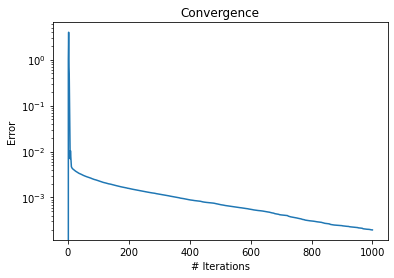

In [23]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')
plt.ylabel('Error')

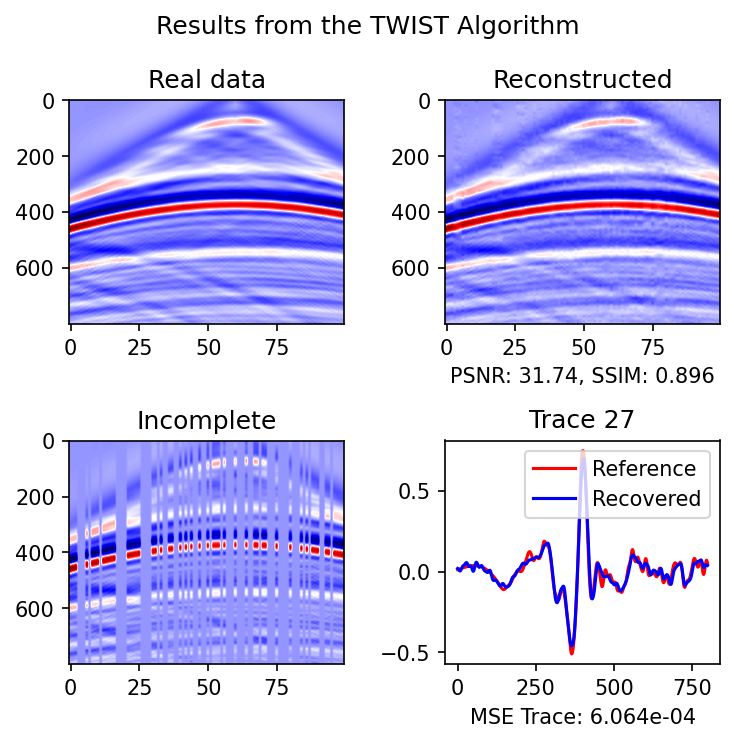

In [24]:
# -----------------
x_rec = x_result_TWIST.copy()

#-----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]

fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

plt.savefig("../twits_results_.eps", dpi=250)

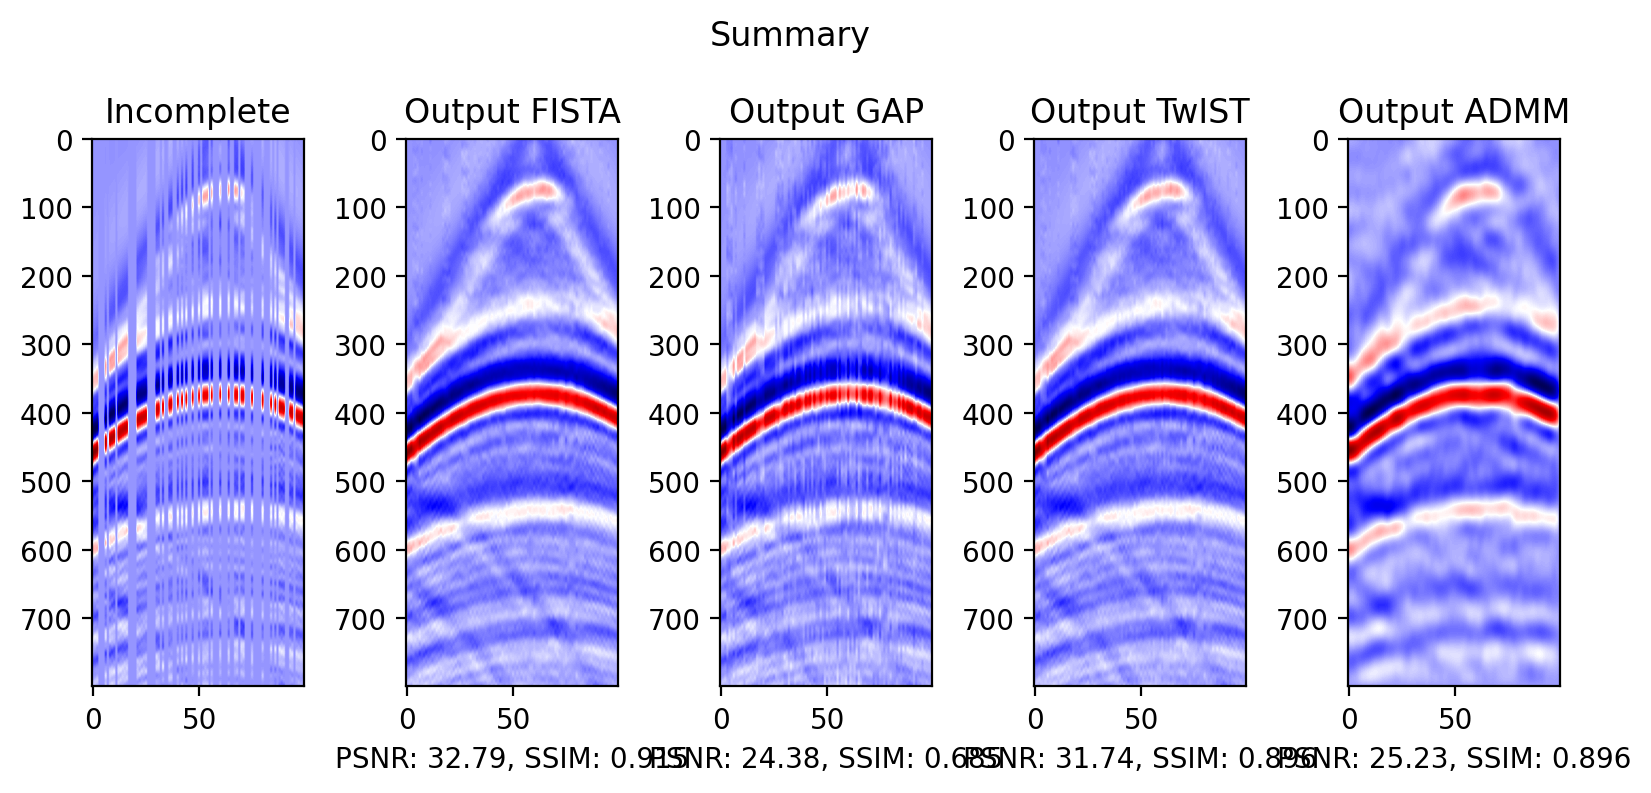

In [28]:
#-------------- Visualization ----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(1,5,dpi=200,figsize=(8, 4))
fig.suptitle('Summary')

axs[0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[0].set_title('Incomplete')


axs[1].imshow(x_result_FISTA, cmap='seismic', aspect='auto')
axs[1].set_title('Output FISTA')
axs[1].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_FISTA[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_FISTA[:, H_elim]):.3f}')


axs[2].imshow(x_result_GAP, cmap='seismic', aspect='auto')
axs[2].set_title('Output GAP')
axs[2].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_GAP[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_GAP[:, H_elim]):.3f}')


axs[3].imshow(x_result_TWIST, cmap='seismic', aspect='auto')
axs[3].set_title('Output TwIST')
axs[3].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_TWIST[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_TWIST[:, H_elim]):.3f}')

axs[4].imshow(x_result_ADMM, cmap='seismic', aspect='auto')
axs[4].set_title('Output ADMM')
axs[4].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_ADMM[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_TWIST[:, H_elim]):.3f}')




fig.tight_layout()
plt.show()

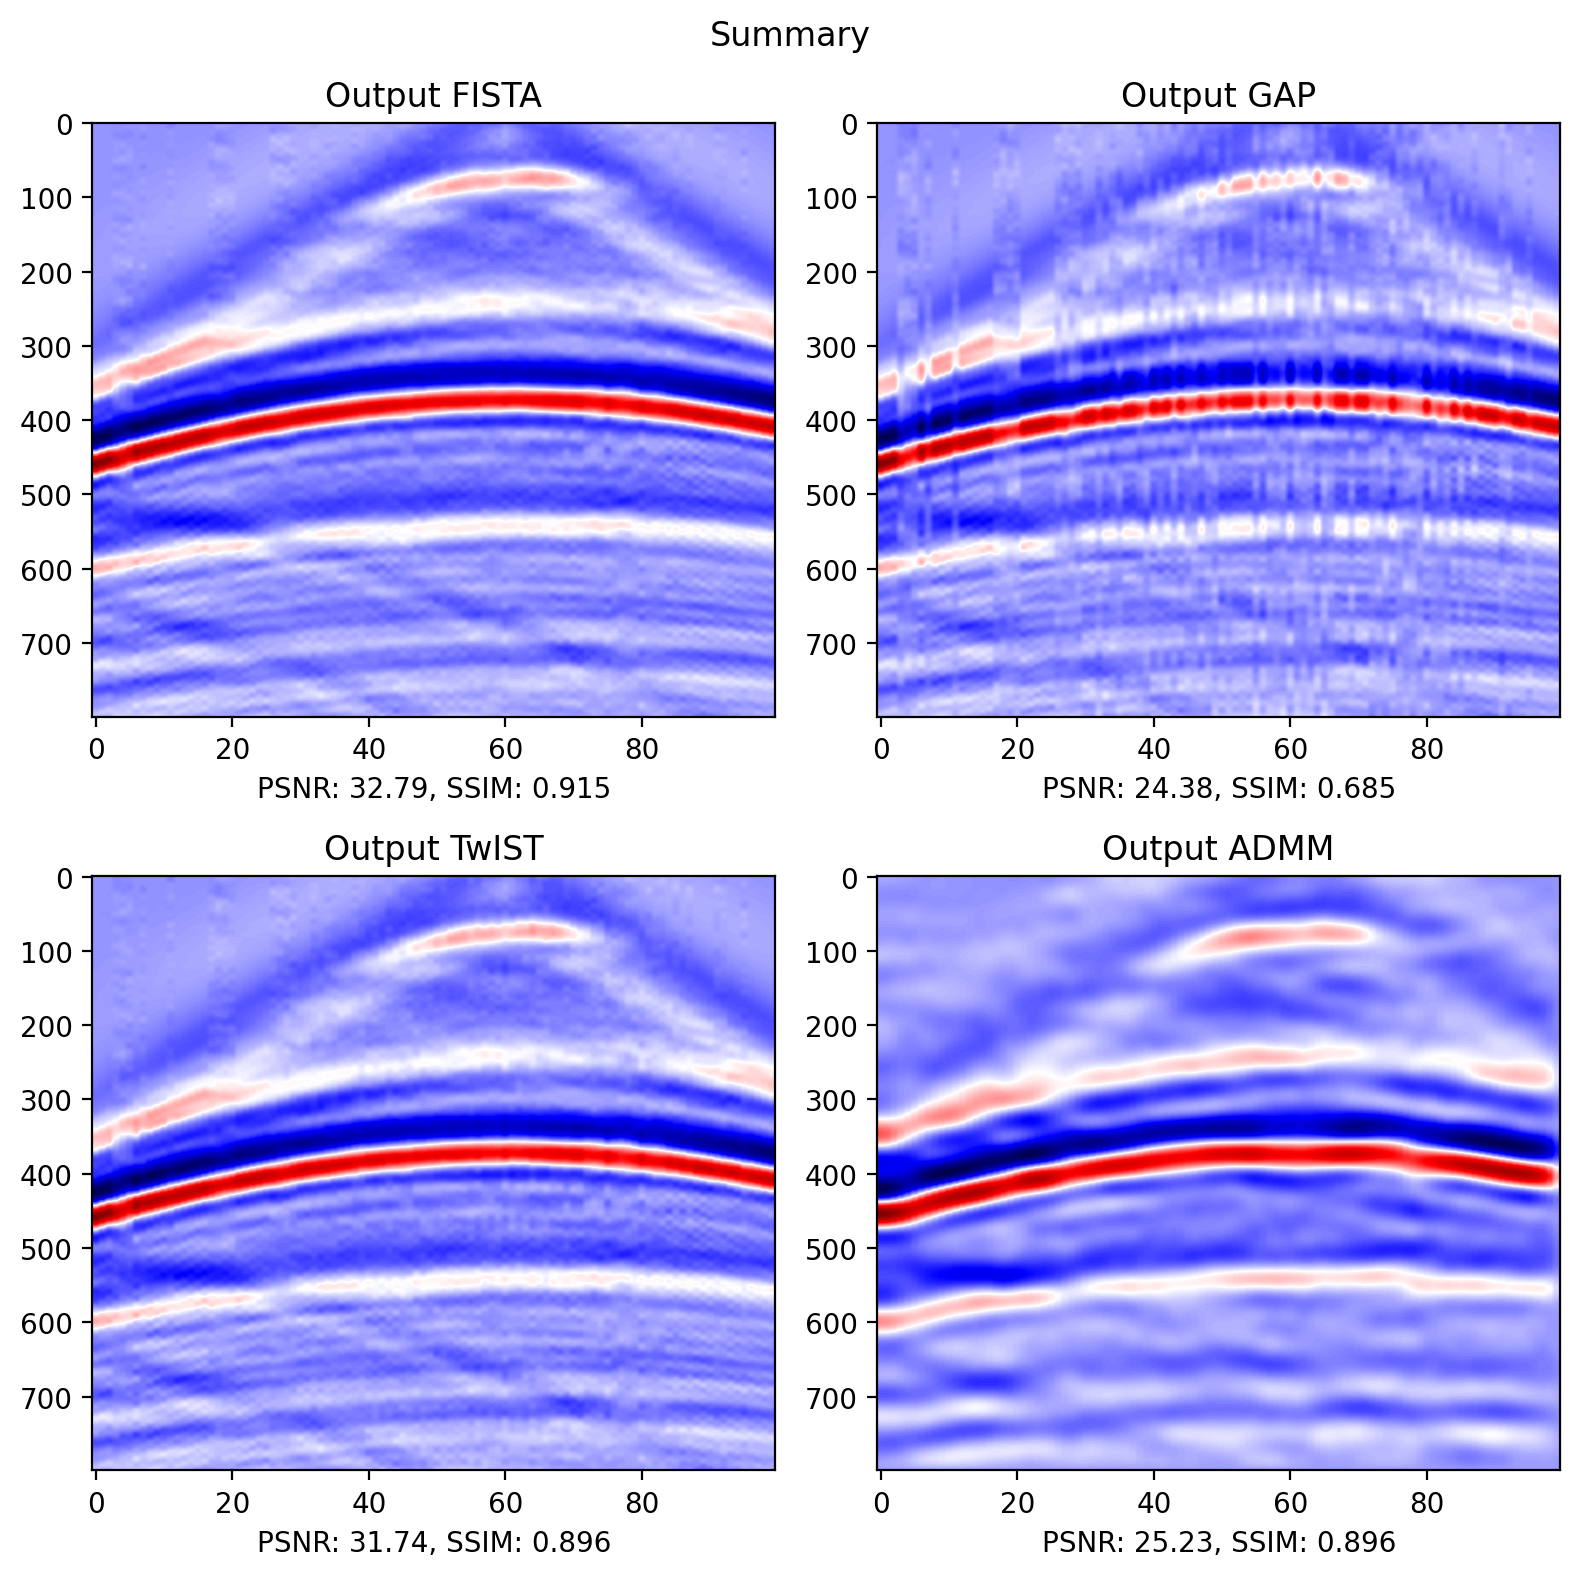

In [34]:
#-------------- Visualization ----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(2,2,dpi=200,figsize=(8, 8))
fig.suptitle('Summary')

#axs[0].imshow(y_rand, cmap='seismic', aspect='auto')
#axs[0].set_title('Incomplete')


axs[0,0].imshow(x_result_FISTA, cmap='seismic', aspect='auto')
axs[0,0].set_title('Output FISTA')
axs[0,0].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_FISTA[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_FISTA[:, H_elim]):.3f}')


axs[0,1].imshow(x_result_GAP, cmap='seismic', aspect='auto')
axs[0,1].set_title('Output GAP')
axs[0,1].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_GAP[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_GAP[:, H_elim]):.3f}')


axs[1,0].imshow(x_result_TWIST, cmap='seismic', aspect='auto')
axs[1,0].set_title('Output TwIST')
axs[1,0].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_TWIST[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_TWIST[:, H_elim]):.3f}')

axs[1,1].imshow(x_result_ADMM, cmap='seismic', aspect='auto')
axs[1,1].set_title('Output ADMM')
axs[1,1].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_ADMM[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_TWIST[:, H_elim]):.3f}')




fig.tight_layout()
plt.show()

plt.savefig("../summary_results_.eps", dpi=250)